# Amy Jung

Coding assignment:
 
Attached is a file with simulated maternity claims.  We ask candidates interviewing for a role our team to look into the data and share with us his/her findings.  You can complete this assignment in whichever programming language you prefer (e.g. SAS, R, Python, SQL, etc).  In addition to providing us with your code, we’d like you to report:
- The average claim cost and length of stay for the entire patient population
- The average claim cost and length of stay for each ICD 10 diagnostic code
- Any other observations / summary statistics you’d like to share
- Any assumptions you made (if any)
- Approximately how long you worked on the project
 
Feel free to send your assignment over before the interview if you complete it early. During the interview we will be going over the code and your results.

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('maternity_claims_2017.csv')
df

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
0,101511,1992-02-24,24,F,37027,2017-01-23,O80,5,15590.55
1,101143,1992-08-22,25,F,37013,2017-09-16,O82,7,37930.46
2,193330,1983-02-22,34,F,37250,2017-10-07,O82,7,24965.33
3,142808,1978-02-25,38,F,37027,2017-01-12,O80,4,8669.38
4,142808,1970-09-11,47,F,37250,2017-12-13,O82,8,21954.30
...,...,...,...,...,...,...,...,...,...
64148,102809,1989-07-22,27,NaN,37122,2017-02-02,O80,4,11357.88
64149,136397,1981-09-28,35,F,37013,2017-08-22,O82,8,22995.74
64150,190534,1976-06-25,40,F,37250,2017-04-21,O69,6,18503.37
64151,137050,1969-05-11,47,F,37250,2017-03-06,O80,7,11688.88


In [6]:
#there are 70 null rows
df.isnull().any()

patient_id               False
date_of_birth            False
patient_age              False
gender                    True
zip_code                 False
date_of_delivery         False
icd_10_diagnosis_code    False
length_of_stay           False
total_claim_cost         False
dtype: bool

In [7]:
#there are 8030 null rows
nulls = df[df['gender'].isnull()]
nulls

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
8,123308,1972-10-09,44,NaN,37122,2017-03-14,O80,5,13126.84
18,107025,1991-08-19,26,NaN,37122,2017-12-08,O80,4,10548.96
20,131810,1991-10-07,25,NaN,37122,2017-09-09,O82,5,14755.51
31,181267,1990-12-09,26,NaN,37122,2017-02-07,O69,11,37980.42
35,170166,1990-06-19,27,NaN,37122,2017-08-30,O80,5,10137.91
...,...,...,...,...,...,...,...,...,...
64137,144047,1991-09-28,26,NaN,37122,2017-10-04,O80,7,20453.20
64139,142808,1979-02-23,38,NaN,37122,2017-08-24,O80,4,3621.72
64141,189132,1971-01-15,46,NaN,37122,2017-03-20,O69,7,18450.53
64146,150037,1998-07-11,19,NaN,37122,2017-09-08,O67,8,21336.14


## Any assumptions you made (if any)
- Assumng nulls in 'gender' column to be Female, because csv is of maternity claims. Therefore, not dropping null columns in analysis.
- negative claims are normal ?

In [8]:
type(df['date_of_delivery'][0])

str

In [9]:
df['date_of_delivery'].unique()

array(['2017-01-23', '2017-09-16', '2017-10-07', '2017-01-12',
       '2017-12-13', '2017-03-20', '2017-10-19', '2017-03-11',
       '2017-03-14', '2017-04-07', '2017-12-05', '2017-04-02',
       '2017-07-12', '2017-09-01', '2017-03-29', '2017-01-03',
       '2017-01-07', '2017-09-28', '2017-12-08', '2017-11-18',
       '2017-09-09', '2017-02-07', '2017-05-07', '2017-07-24',
       '2017-06-29', '2017-01-16', '2017-04-12', '2017-08-23',
       '2017-10-11', '2017-03-10', '2017-09-14', '2017-07-07',
       '2017-08-30', '2017-01-06', '2017-12-06', '2017-05-14',
       '2017-05-02', '2017-02-19', '2017-07-31', '2017-12-12',
       '2017-08-03', '2017-03-01', '2017-08-21', '2017-08-06',
       '2017-11-25', '2017-12-17', '2017-06-07', '2017-06-20',
       '2017-10-20', '2017-10-12', '2017-06-10', '2017-04-24',
       '2017-06-11', '2017-08-20', '2017-03-02', '2017-03-24',
       '2017-06-26', '2017-02-06', '2017-08-29', '2017-11-20',
       '2017-06-12', '2017-11-02', '2017-01-25', '2017-

## The average claim cost and length of stay for the entire patient population

### claim cost

In [10]:
# avg claim cost
np.mean(df['total_claim_cost'])

18901.730289776002

<AxesSubplot:>

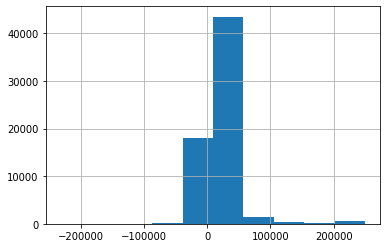

In [11]:
df['total_claim_cost'].hist()

In [12]:
df['total_claim_cost'].sort_values()

25282   -232105.71
31515   -201340.82
14173   -175619.58
42566   -169745.38
8541    -167863.65
           ...    
40604    250000.00
54041    250000.00
46465    250000.00
59026    250000.00
20165    250000.00
Name: total_claim_cost, Length: 64153, dtype: float64

In [13]:
# 1888 negative claims
len(df[df['total_claim_cost'] < 0]) 

1888

**Are negative claims a thing??**

In [14]:
# avg positive claim cost
np.mean(df[df['total_claim_cost'] >= 0]['total_claim_cost'])

19839.145641692765

In [15]:
# avg negative claim cost
np.mean(df[df['total_claim_cost'] < 0]['total_claim_cost'])

-12013.612341101696

### length of stay

In [16]:
# avg length of stay 
np.mean(df['length_of_stay'])

5.488083176157

<AxesSubplot:>

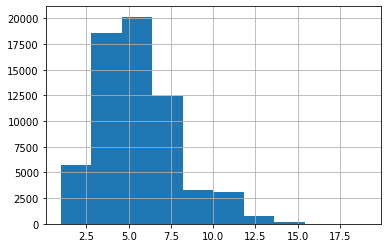

In [17]:
df['length_of_stay'].hist()

## The average claim cost and length of stay for each ICD 10 diagnostic code

In [18]:
# the different unique ICD 10 codes
unique_icd_codes = df['icd_10_diagnosis_code'].unique()
unique_icd_codes

array(['O80', 'O82', 'O03', 'O69', 'O67'], dtype=object)

In [19]:
# sanity check for ICD 10: O80
df[df['icd_10_diagnosis_code']=='O80']

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
0,101511,1992-02-24,24,F,37027,2017-01-23,O80,5,15590.55
3,142808,1978-02-25,38,F,37027,2017-01-12,O80,4,8669.38
5,189210,1989-08-31,27,F,37250,2017-03-20,O80,5,11415.21
6,129631,1981-04-24,36,F,37250,2017-10-19,O80,5,14280.38
8,123308,1972-10-09,44,NaN,37122,2017-03-14,O80,5,13126.84
...,...,...,...,...,...,...,...,...,...
64144,185761,1988-01-22,29,F,37167,2017-12-27,O80,6,8008.90
64145,169604,1980-11-12,36,F,37013,2017-04-26,O80,8,23949.26
64147,116312,1996-01-19,21,F,37027,2017-03-17,O80,4,11958.67
64148,102809,1989-07-22,27,NaN,37122,2017-02-02,O80,4,11357.88


In [20]:
for code in unique_icd_codes: 
    print(f'For ICD', code)
    
    cost = np.mean(df[df['icd_10_diagnosis_code']==code]['total_claim_cost'])
    print(f'average total_claim_cost: ', cost)

    stay = np.mean(df[df['icd_10_diagnosis_code']==code]['length_of_stay'])
    print(f'average length_of_stay: ', stay)
    print(" ")

For ICD O80
average total_claim_cost:  9828.935643862127
average length_of_stay:  4.563601652806109
 
For ICD O82
average total_claim_cost:  31630.645867922765
average length_of_stay:  6.607965674843765
 
For ICD O03
average total_claim_cost:  21368.911271704572
average length_of_stay:  5.57128882367327
 
For ICD O69
average total_claim_cost:  35056.783305654404
average length_of_stay:  7.539739027283511
 
For ICD O67
average total_claim_cost:  38524.39550686291
average length_of_stay:  7.576153464527865
 


## Any other observations / summary statistics you’d like to share

### Patient age
There may be something wrong with the patient age. 

<AxesSubplot:>

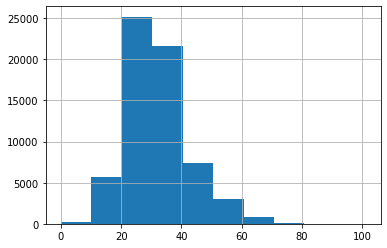

In [21]:
df['patient_age'].hist()

In [22]:
df['patient_age'].sort_values()

11667      0
45971      1
49442      1
40301      3
35098      3
        ... 
50486     85
13135     91
35065     94
42207     95
57173    101
Name: patient_age, Length: 64153, dtype: int64

Repeating patients

In [23]:
# Are there repeating patients? Are the patient IDs all unique
len(df['patient_id'].unique()) # 64153 rows in df 

57364

<AxesSubplot:>

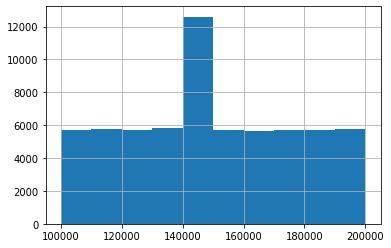

In [24]:
df['patient_id'].hist()

In [25]:
df['patient_id']

0        101511
1        101143
2        193330
3        142808
4        142808
          ...  
64148    102809
64149    136397
64150    190534
64151    137050
64152    157354
Name: patient_id, Length: 64153, dtype: int64

In [26]:
id_dict = {}
for ID in df['patient_id']:
    if ID not in id_dict.keys():
        id_dict[ID] = 1
    else:
        id_dict[ID] += 1

In [27]:
sorted(id_dict.items(), key=lambda x: x[1], reverse=True)[0:10]

[(142808, 6790),
 (101511, 1),
 (101143, 1),
 (193330, 1),
 (189210, 1),
 (129631, 1),
 (141924, 1),
 (123308, 1),
 (195451, 1),
 (116116, 1)]

In [28]:
id_error = df[df['patient_id'] == 142808]
id_error

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
3,142808,1978-02-25,38,F,37027,2017-01-12,O80,4,8669.38
4,142808,1970-09-11,47,F,37250,2017-12-13,O82,8,21954.30
16,142808,1991-04-12,25,F,37013,2017-01-07,O80,12,34030.83
29,142808,1987-11-08,29,F,37250,2017-08-23,O80,6,15846.48
36,142808,1975-08-28,41,NaN,37122,2017-01-06,O03,5,12039.82
...,...,...,...,...,...,...,...,...,...
64098,142808,1979-05-30,37,F,37013,2017-02-04,O80,6,20798.25
64102,142808,2000-05-08,17,F,37027,2017-07-26,O80,3,7266.08
64103,142808,2001-05-20,16,F,37013,2017-11-22,O80,5,11627.90
64113,142808,1983-12-31,33,F,37250,2017-08-31,O67,11,35808.68


# END OF CODING ASSIGNMENT

## Deep Learning
vs. machine learning (feature extraction by hand)

### CNNs
- CNN learns the filters automatically without mentioning it explicitly. These filters help in extracting the right and relevant features from the input data
(https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/)

Used CNN instead of RNN because this data is not exacty "sequential" (time series). 

In [29]:
df['zip_code'].unique()

array([37027, 37013, 37250, 37167, 37122, 35896])

In [34]:
tf.__version__

'2.8.0'

In [33]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
import os
import random

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error

use patient age, zip code, ICD code, and length of stay **to predict total_claim_cost**

In [35]:
df.columns

Index(['patient_id', 'date_of_birth', 'patient_age', 'gender', 'zip_code',
       'date_of_delivery', 'icd_10_diagnosis_code', 'length_of_stay',
       'total_claim_cost'],
      dtype='object')

In [40]:
new_df = df[['patient_age', 'zip_code', 'icd_10_diagnosis_code', 'length_of_stay', 'total_claim_cost']]
new_df

,patient_age,zip_code,icd_10_diagnosis_code,length_of_stay,total_claim_cost
0,24,37027,O80,5,15590.55
1,25,37013,O82,7,37930.46
2,34,37250,O82,7,24965.33
3,38,37027,O80,4,8669.38
4,47,37250,O82,8,21954.30
...,...,...,...,...,...
64148,27,37122,O80,4,11357.88
64149,35,37013,O82,8,22995.74
64150,40,37250,O69,6,18503.37
64151,47,37250,O80,7,11688.88


reference for code: https://machinelearningmastery.com/using-cnn-for-financial-time-series-prediction/

### Data Preprocessing
TO DO: turn data points into matrices

In [41]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
 
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
 
def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

### Model

In [ ]:
def cnnpred_2d(seq_len=60, n_features=82, n_filters=(8,8,8), droprate=0.1):
    "2D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(seq_len, n_features, 1)),
        Conv2D(n_filters[0], kernel_size=(1, n_features), activation="relu"),
        Conv2D(n_filters[1], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Conv2D(n_filters[2], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Flatten(),
        Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

In [ ]:
# Produce CNNpred as a binary classification problem
model = cnnpred_2d(seq_len, n_features)
model.compile(optimizer="adam", loss="mae", metrics=["acc", f1macro])
model.summary()  # print model structure to console
 
# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp2d-{epoch}-{val_f1macro:.2f}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]
model.fit(datagen(data, seq_len, batch_size, "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "Target", "valid"),
          epochs=n_epochs, steps_per_epoch=400, validation_steps=10, verbose=1, callbacks=callbacks)
 
# Prepare test data
test_data, test_target = testgen(data, seq_len, "Target")
 
# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("MAE:", mean_absolute_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))